In [1]:
import numpy as np
import matplotlib.pyplot as plt

# from ieeg_utils import *
from lleventdetector import *
from lltransform import *
from get_iEEG_data import *
from IES_helper_functions import *  # _eegfilt,_FindPeaks,_make_fake,_multi_channel_requirement,_car,_electrode_selection

from ieeg.auth import Session

In [2]:
def create_pwd_file(username, password, fname=None):
    if fname is None:
        fname = "{}_ieeglogin.bin".format(username[:3])
    with open(fname, "wb") as f:
        f.write(password.encode())
    print("-- -- IEEG password file saved -- --")


create_pwd_file("dma", "mycqEv-pevfo4-roqfan")

with open("dma_ieeglogin.bin", "r") as f:
    session = Session("dma", f.read())

-- -- IEEG password file saved -- --


In [5]:
with open("dma_ieeglogin.bin", "r") as f:
    s = Session("dma", f.read())
ds = s.open_dataset("HUP210_phaseII")
all_channel_labels = np.array(ds.get_channel_labels())
label_idxs = electrode_selection(all_channel_labels)
labels = all_channel_labels[label_idxs]
labels

array(['LA01', 'LA02', 'LA03', 'LA04', 'LA05', 'LA06', 'LA07', 'LA08',
       'LA09', 'LA10', 'LA11', 'LA12', 'LB01', 'LB02', 'LB03', 'LB04',
       'LB05', 'LB06', 'LB07', 'LB08', 'LB09', 'LB10', 'LB11', 'LB12',
       'LC01', 'LC02', 'LC03', 'LC04', 'LC05', 'LC06', 'LC07', 'LC08',
       'LC09', 'LC10', 'LC11', 'LD01', 'LD02', 'LD03', 'LD04', 'LD05',
       'LD06', 'LD07', 'LD08', 'LD09', 'LD10', 'LD11', 'LD12', 'LE01',
       'LE02', 'LE03', 'LE04', 'LE05', 'LE06', 'LE07', 'LE08', 'LE09',
       'LE10', 'LE11', 'LE12', 'LF01', 'LF02', 'LF03', 'LF04', 'LF05',
       'LF06', 'LF07', 'LF08', 'LF09', 'LF10', 'LF11', 'LF12', 'LG01',
       'LG02', 'LG03', 'LG04', 'LG05', 'LG06', 'LG07', 'LG08', 'LG09',
       'LG10', 'LG11', 'LG12', 'LH01', 'LH02', 'LH03', 'LH04', 'LH05',
       'LH06', 'LH07', 'LH08', 'LH09', 'LH10', 'LH11', 'LH12', 'LI01',
       'LI02', 'LI03', 'LI04', 'LI05', 'LI06', 'LI07', 'LI08', 'LI09',
       'LI10', 'LI11', 'LI12', 'LJ01', 'LJ02', 'LJ03', 'LJ04', 'LJ05',
      

In [6]:
data, fs = get_iEEG_data(
    "dma", "dma_ieeglogin.bin", "HUP210_phaseII", 596200 * 1e6, 596400 * 1e6, labels
)

data = data.T
data = data.to_numpy()
data.shape

(191, 204800)

In [10]:
actual = lleventdetector(data, fs, 99.9, 3)
actual

(array([[106326., 106335.],
        [108599., 108611.],
        [108614., 108626.],
        [109060., 109066.],
        [109183., 109191.],
        [109281., 109300.],
        [112453., 112471.],
        [112701., 112705.],
        [112860., 112903.],
        [112987., 112991.],
        [113495., 113508.],
        [113523., 113532.],
        [113634., 113641.],
        [113656., 113665.],
        [113678., 113695.],
        [113738., 113750.],
        [113847., 113852.],
        [113860., 113872.],
        [113892., 113897.],
        [114118., 116270.],
        [116312., 116316.],
        [116364., 116370.],
        [116378., 116382.],
        [116391., 116398.],
        [116412., 116416.],
        [116421., 116424.],
        [116470., 116480.],
        [116508., 116512.],
        [116533., 116545.],
        [116553., 116556.],
        [116583., 116594.],
        [116598., 116611.],
        [116640., 116643.],
        [116652., 125053.],
        [125068., 125072.],
        [125074., 12

In [8]:
origins = np.array(actual[1])
origins.shape
origins

array(['45,', '45,', '45,', '45,', '45,', '45,', '45,', '45,', '45,',
       '45,', '45,', '45,', '45,', '45,', '46,', '45,', '46,', '46,',
       '45,', '45,46,168,179,180,188,', '46,', '45,', '45,', '45,', '46,',
       '46,', '46,', '46,', '45,', '46,', '46,169,178,', '169,', '45,',
       '45,46,106,117,167,168,169,170,178,179,180,188,', '167,179,',
       '167,179,', '167,168,179,', '167,179,', '167,179,', '167,', '167,',
       '167,179,', '167,', '167,', '167,', '167,', '167,', '167,',
       '46,167,', '167,', '167,', '167,', '167,', '167,179,', '167,',
       '167,', '167,', '167,', '167,', '167,', '167,', '167,', '46,167,',
       '167,', '167,', '167,', '167,', '167,', '167,', '167,', '167,',
       '167,', '167,', '46,', '46,', '167,', '46,', '167,', '167,',
       '167,', '167,', '46,', '46,', '167,', '167,', '46,167,', '46,',
       '46,', '46,', '167,', '46,', '46,', '46,', '46,', '46,', '46,',
       '46,', '46,', '46,', '46,', '46,', '46,', '46,', '46,', '46,',
       

In [13]:
labels[33]

'LC10'

In [9]:
actual[0]

array([132087., 132090.])

In [38]:
origins[110]

'6,7,'

In [51]:
spike_window = (468000, 468700)

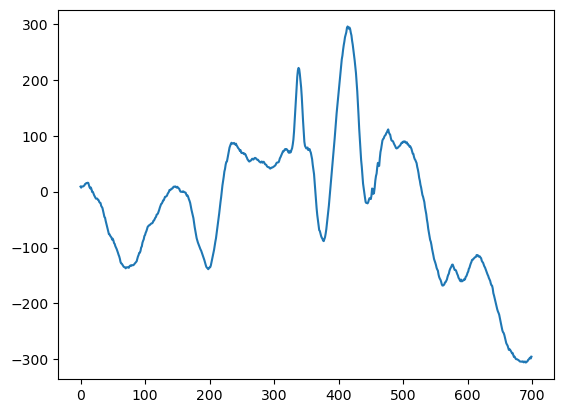

In [55]:
plt.plot(data[6][spike_window[0] : spike_window[1]])
plt.show()

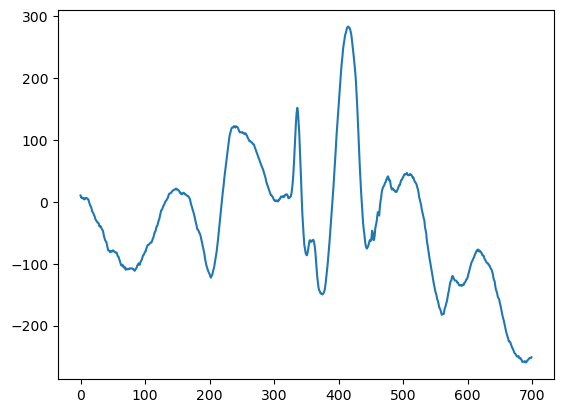

In [56]:
plt.plot(data[7][spike_window[0] : spike_window[1]])
plt.show()

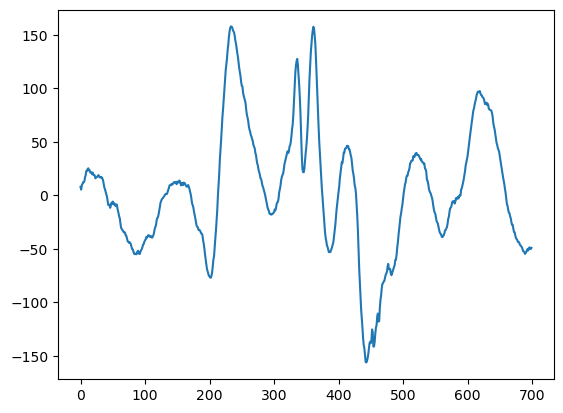

In [57]:
plt.plot(data[8][spike_window[0] : spike_window[1]])
plt.show()